<a href="https://colab.research.google.com/github/Rudh1830/Customer-Segmentation-Using-Hierarchical-Clustering/blob/main/Customer_Segmentation_Using_Hierarchical_Clustering_(Mall_Customers_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')

print("DataFrame loaded successfully. Displaying the first 5 rows:")
df.head()

DataFrame loaded successfully. Displaying the first 5 rows:


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual_Income_(k$)', 'Spending_Score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows of the scaled data (X_scaled):")
print(X_scaled[:5])

First 5 rows of the scaled data (X_scaled):
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


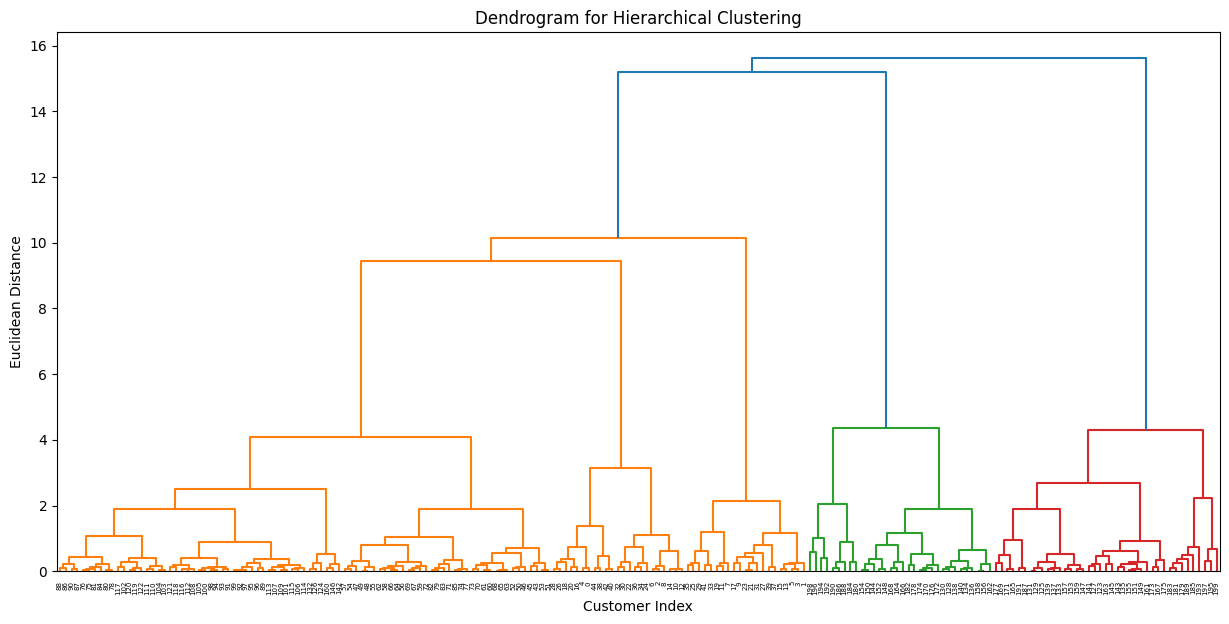

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.show()

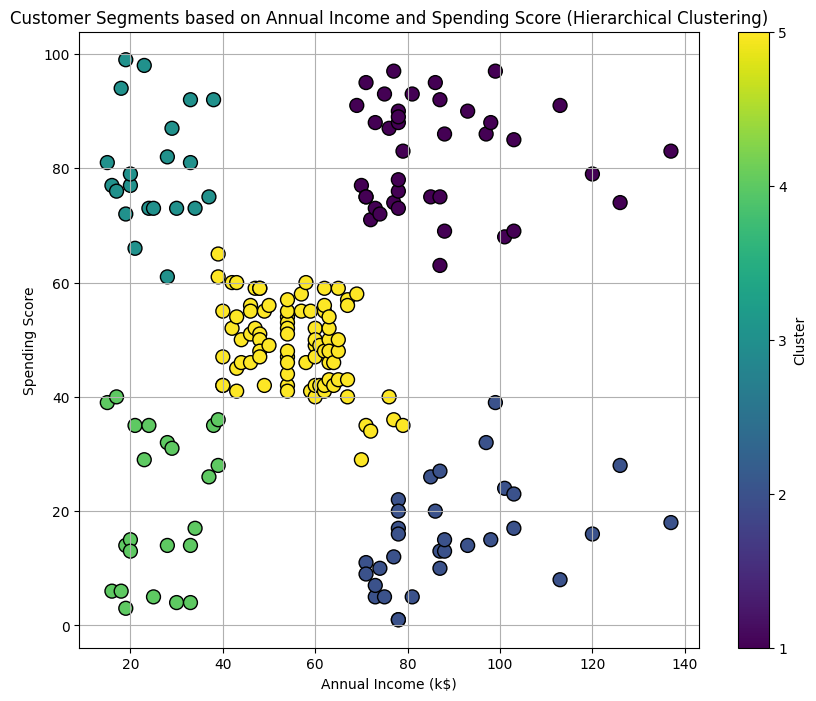

Data points visualized with 5 clusters. Each color represents a different cluster.


In [ ]:
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import numpy as np
k = 5 # Optimal number of clusters
clusters = fcluster(linked, k, criterion='maxclust')
X_with_clusters = X.copy()
X_with_clusters['Cluster'] = clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_with_clusters['Annual_Income_(k$)'],
                      X_with_clusters['Spending_Score'],
                      c=X_with_clusters['Cluster'],
                      cmap='viridis',
                      s=100,
                      edgecolors='k')

plt.title('Customer Segments based on Annual Income and Spending Score (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.colorbar(scatter, ticks=range(1, k + 1), label='Cluster')
plt.grid(True)
plt.show()

print(f"Data points visualized with {k} clusters. Each color represents a different cluster.")

In [ ]:
cluster_summary = X_with_clusters.groupby('Cluster')[['Annual_Income_(k$)', 'Spending_Score']].mean()
cluster_summary['Count'] = X_with_clusters.groupby('Cluster').size()

print("Cluster Summary (Mean Income, Mean Spending Score, and Count per Cluster):")
print(cluster_summary)

Cluster Summary (Mean Income, Mean Spending Score, and Count per Cluster):
         Annual_Income_(k$)  Spending_Score  Count
Cluster                                           
1                 86.538462       82.128205     39
2                 89.406250       15.593750     32
3                 25.095238       80.047619     21
4                 26.304348       20.913043     23
5                 55.811765       49.129412     85
